In [1]:
import numpy as np
from scipy.ndimage.filters import generic_filter as gf
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import scipy.stats.mstats as ms
import scipy.ndimage.morphology as morph
Image.MAX_IMAGE_PIXELS = None

In [2]:
def create_circular_mask(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    mask[radius][radius] = 0
    kernel[mask] = 1
    return kernel

In [189]:
import os

for folder in os.listdir("../cropped_data/3_zones"):
    for imageName in os.listdir(f"../cropped_data/3_zones/{folder}"):
        print(imageName)
        np.save(f"{imageName[23:-4]}_raw.npy", np.asarray(Image.open(f"../cropped_data/3_zones/{folder}/{imageName}")))


#imSlope = Image.open("../raw_data/Composite_3rutor/Slope_3rutor.tif")

#slopeArr = np.asarray(imSlope)
#np.save("ditches_zone3.npy", ditchesArr)


croppedImage_2625x3000_Ditches_zone1.tif
croppedImage_2625x3000_HPMF_zone1.tif
croppedImage_2625x3000_Impoundment_zone1.tif
croppedImage_2625x3000_Skyview_zone1.tif
croppedImage_2625x3000_Slope_zone1.tif
croppedImage_2625x3000_Ditches_zone2.tif
croppedImage_2625x3000_HPMF_zone2.tif
croppedImage_2625x3000_Impoundment_zone2.tif
croppedImage_2625x3000_Skyview_zone2.tif
croppedImage_2625x3000_Slope_zone2.tif
croppedImage_2625x3000_Ditches_zone3.tif
croppedImage_2625x3000_HPMF_zone3.tif
croppedImage_2625x3000_Impoundment_zone3.tif
croppedImage_2625x3000_Skyview_zone3.tif
croppedImage_2625x3000_Slope_zone3.tif


In [160]:
#im = Image.open("../cropped_data/croppedImage_skyview130x130.tif")
#im = Image.open("../cropped_data/croppedImage_skyview200x200.tif")
#im = Image.open("../cropped_data/croppedImage_impoundment400x400.tif")
#im = Image.open("../cropped_data/croppedImage_skyview400x400.tif")
#im = Image.open("../cropped_data/croppedImage_skyview2500x2500.tif")
#im = Image.open("../cropped_data/croppedImage_skyview1000x1000.tif")
#skyViewIm = Image.open("../cropped_data/croppedImage_Skyview500x500_10299_10601_10799_11101.tif")
#skyViewArr = np.asarray(skyViewIm)
#slopeIm = Image.open("../cropped_data/croppedImage_Slope500x500.tif")
#slopeArr = np.asarray(slopeIm)
#impoundmentIm = Image.open("../cropped_data/croppedImage_Impoundment500x500.tif")
#impoundmentArr = np.asarray(impoundmentIm)
#HPMFIm = Image.open("../cropped_data/croppedImage_HPMF500x500.tif")
#HPMFArr = np.asarray(HPMFIm)
#ditchesIm = Image.open("../cropped_data/croppedImage_Ditches500x500.tif")
#ditchesArr = np.asarray(ditchesIm)

skyViewIm = Image.open("../cropped_data/croppedImage_2625x3000_skyview_9950_8302_12575_11302.tif")
skyViewArr = np.asarray(skyViewIm)
slopeIm = Image.open("../cropped_data/croppedImage_2625x3000_Slope.tif")
slopeArr = np.asarray(slopeIm)
impoundmentIm = Image.open("../cropped_data/croppedImage_2625x3000_Impoundment.tif")
impoundmentArr = np.asarray(impoundmentIm)
HPMFIm = Image.open("../cropped_data/croppedImage_2625x3000_HPMF.tif")
HPMFArr = np.asarray(HPMFIm)
ditchesIm = Image.open("../cropped_data/croppedImage_2625x3000_Ditches.tif")
ditchesArr = np.asarray(ditchesIm)




'''
plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,4,i+1) for i in range(8)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax[0].title.set_text("Top Right")
ax[0].imshow(create_conic_mask(40, 0))
ax[1].title.set_text("Right Top")
ax[1].imshow(create_conic_mask(40, 1))
ax[2].title.set_text("Right Bottom")
ax[2].imshow(create_conic_mask(40, 2))
ax[3].title.set_text("Bottom Right")
ax[3].imshow(create_conic_mask(40, 3))
ax[4].title.set_text("Bottom Left")
ax[4].imshow(create_conic_mask(40, 4))
ax[5].title.set_text("Left Bottom")
ax[5].imshow(create_conic_mask(40, 5))
ax[6].title.set_text("Left Top")
ax[6].imshow(create_conic_mask(40, 6))
ax[7].title.set_text("Top Left")
ax[7].imshow(create_conic_mask(40, 7))
'''


newConicArr = conicMean(skyViewArr, 5, 0.975)

circ_mask3 = create_circular_mask(3)
circ_mask4 = create_circular_mask(4)
circ_mask6 = create_circular_mask(6)
circ_mask15 = create_circular_mask(15)
circ_mask25 = create_circular_mask(25)

meanGreyOpen = morph.grey_opening(gf(newConicArr,np.nanmean,footprint=circ_mask4), footprint=circ_mask4)

'''
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,3,i+1) for i in range(5)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)


ax[0].title.set_text("Ditches")
ax[0].imshow(ditchesArr)

ax[1].title.set_text("Slope")
ax[1].imshow(slopeArr)

ax[2].title.set_text("SkyViewFactor")
ax[2].imshow(skyViewArr)

ax[3].title.set_text("HPMF")
ax[3].imshow(HPMFArr)

ax[4].title.set_text("Impoundment")
ax[4].imshow(impoundmentArr)
'''


np.save("hpmf_feature_means3_zone3.npy", gf(HPMFArr,np.nanmean,footprint=circ_mask3))
np.save("slope_feature_mean3_zone3.npy", gf(slopeArr,np.nanmean,footprint=circ_mask3))
np.save("impoundment_feature_mean3_zone3.npy", gf(impoundmentArr,np.nanmean,footprint=circ_mask3))
np.save("skyview_feature_cone_5_0975_mean4_opening4.npy", meanGreyOpen)
np.save("ditches_zone3.npy", ditchesArr)




'''
hpmf = np.load("hpmf_feature500.npy")
slope = np.load("slope_feature500.npy")
impoundment = np.load("impoundment_feature500.npy")
skyview = np.load("skyview_feature500.npy")

plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
ax = [plt.subplot(3,4,i+1) for i in range(12)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)


ax[0].title.set_text("Original Slope")
ax[0].imshow(slopeArr)

ax[1].title.set_text("Slope mean 6")
ax[1].imshow(slope)

ax[2].title.set_text("Original SkyViewFactor")
ax[2].imshow(skyViewArr)

ax[3].title.set_text("SkyViewFactor Conic Filter: 5, 0.975,\n mean 4 grey open 4")
ax[3].imshow(skyview)

ax[4].title.set_text("Original Impoundment")
ax[4].imshow(impoundmentArr)

ax[5].title.set_text("Impoundment mean 3")
ax[5].imshow(impoundment)

ax[6].title.set_text("HPMF Original")
ax[6].imshow(HPMFArr)

ax[7].title.set_text("HPMF mean 3")
ax[7].imshow(hpmf)

def rasterToZones(arr, zoneSize):
    newArr = arr.copy()
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            numberOfClassified = 0
            if i < len(arr) - zoneSize and j < len(arr) - zoneSize:
                for k in range(zoneSize):
                    for l in range(zoneSize):
                        if arr[i + k][j + l] == 1:
                            numberOfClassified += 1
                if numberOfClassified > (zoneSize**2)/2:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 1
                else:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 0
    return newArr
                
                
                
def linearCombination(hpmfFeature, impoundmentFeature, slopeFeature, skyviewFeature):
    newArr = slopeArr.copy()
    for i in range(len(newArr)):
        for j in range(len(newArr[i])):
            thresholdElements = 0
            if slopeFeature[i][j] > 20:
                thresholdElements += 1
            if skyviewFeature[i][j] < 0.97:
                thresholdElements += 1
            if hpmfFeature[i][j] < -100000000:
                thresholdElements += 1
            if impoundmentFeature[i][j] > 800000000:
                thresholdElements += 1
            if thresholdElements >= 3:
                newArr[i][j] = 1
            else:
                newArr[i][j] = 0
    return newArr

linearCombinationClassification = linearCombination(hpmf, impoundment, slope, skyview)

ax[8].title.set_text("Classification linear combination > 3/4 features,\n hpmf < -100000000, impoundment > 800000000,\n skyview < 0.97, slope > 20")
ax[8].imshow(linearCombinationClassification)

ax[9].title.set_text("Classification linear combination zones 6*6,\n more than 18")
ax[9].imshow(rasterToZones(linearCombinationClassification, 6))

ax[10].title.set_text("Classification linear combination zones 4*4,\n more than 8")
ax[10].imshow(rasterToZones(linearCombinationClassification, 4))

ax[11].title.set_text("Ditches")
ax[11].imshow(ditchesArr)


plt.savefig('500x500linearClassificationTest.eps', format='eps', dpi='figure')
'''

575007


'\nhpmf = np.load("hpmf_feature500.npy")\nslope = np.load("slope_feature500.npy")\nimpoundment = np.load("impoundment_feature500.npy")\nskyview = np.load("skyview_feature500.npy")\n\nplt.figure(num=None, figsize=(28,26), facecolor=\'w\', edgecolor=\'k\')\nax = [plt.subplot(3,4,i+1) for i in range(12)]\nfor a in ax:\n    a.set_xticklabels([])\n    a.set_yticklabels([])\n    a.tick_params(bottom=False, left=False)\nplt.subplots_adjust(wspace=0,hspace=0)\n\n\nax[0].title.set_text("Original Slope")\nax[0].imshow(slopeArr)\n\nax[1].title.set_text("Slope mean 6")\nax[1].imshow(slope)\n\nax[2].title.set_text("Original SkyViewFactor")\nax[2].imshow(skyViewArr)\n\nax[3].title.set_text("SkyViewFactor Conic Filter: 5, 0.975,\n mean 4 grey open 4")\nax[3].imshow(skyview)\n\nax[4].title.set_text("Original Impoundment")\nax[4].imshow(impoundmentArr)\n\nax[5].title.set_text("Impoundment mean 3")\nax[5].imshow(impoundment)\n\nax[6].title.set_text("HPMF Original")\nax[6].imshow(HPMFArr)\n\nax[7].title.

In [194]:
def create_conic_mask(radius, direction):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    
    if direction == 0: #topright
        mask = (x > y) & (x < abs(y)) & (x**2 + y**2 <= radius**2) & (x > 0)
    elif direction == 1: #righttop
        mask = (x > abs(y)) & (x**2 + y**2 <= radius**2) & (y < 0)
    elif direction == 2: #rightbottom
        mask = (x > abs(y)) & (x**2 + y**2 <= radius**2) & (y > 0)
    elif direction == 3: #bottomright
        mask = (abs(x) < y) & (x**2 + y**2 <= radius**2) & (x > 0)
    elif direction == 4: #bottomleft
        mask = (abs(x) < y) & (x**2 + y**2 <= radius**2) & (x < 0)
    elif direction == 5: #leftbottom
        mask = (abs(x) > abs(y)) & (x < abs(y)) & (x**2 + y**2 <= radius**2) & (y > 0)
    elif direction == 6: #lefttop
        mask = (abs(x) > abs(y)) & (x < abs(y)) & (x**2 + y**2 <= radius**2) & (y < 0)
    elif direction == 7: #topleft
        mask = (x > y) & (x < abs(y)) & (x**2 + y**2 <= radius**2) & (x < 0)
    kernel[mask] = 1
    return kernel

def conicMean(arr, maskRadius, threshold):
    masks = []
    for i in range(0, 8):
        masks.append(create_conic_mask(maskRadius, i))
    newArr = arr.copy()
    amountOfThresholds = 0
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            topRight = meanFromMask(arr, (i, j), masks[0])
            rightTop = meanFromMask(arr, (i, j), masks[1])
            rightBottom = meanFromMask(arr, (i, j), masks[2])
            bottomRight = meanFromMask(arr, (i, j), masks[3])
            bottomLeft = meanFromMask(arr, (i, j), masks[4])
            leftBottom = meanFromMask(arr, (i, j), masks[5])
            leftTop = meanFromMask(arr, (i, j), masks[6])
            topLeft = meanFromMask(arr, (i, j), masks[7])
            if topRight < threshold:
                if bottomLeft < threshold:
                    amountOfThresholds += 1
                    newArr[i][j] = 0.95 * (topRight if topRight < bottomLeft else bottomLeft)
            
            elif rightTop < threshold:
                if leftBottom < threshold:
                    amountOfThresholds += 1
                    newArr[i][j] = 0.95 * (leftBottom if leftBottom < rightTop else rightTop)
            
            elif rightBottom < threshold:
                if leftTop < threshold:
                    amountOfThresholds += 1
                    newArr[i][j] = 0.95 * (rightBottom if rightBottom < leftTop else leftTop)
            
            elif bottomRight < threshold:
                if topLeft < threshold:
                    amountOfThresholds += 1
                    newArr[i][j] = 0.95 * (bottomRight if bottomRight < topLeft else topLeft)
            if newArr[i][j] > arr[i][j]:
                newArr[i][j] = arr[i][j]
    print(amountOfThresholds)        
    return newArr

def meanFromMask(arr, index, mask):
    elementAmount = 0
    row = index[0]
    col = index[1]
    
    halfMask = len(mask) // 2
    
    arrLenRow = len(arr)
    arrLenCol = len(arr[row])
    
    elementSum = 0
    for i in range(-halfMask , halfMask):
        for j in range(-halfMask , halfMask):
            if arrLenCol > col + j + 1 or col + j + 1 >= 0 or arrLenRow > row + i + 1 or row + i + 1 >= 0:
                if mask[i + halfMask][j + halfMask] == 1:
                    if row + i + 1 < arrLenRow:
                        if col + j + 1 < arrLenCol:
                            elementSum += arr[row + i][col + j]
                            elementAmount += 1
    return elementSum / elementAmount if elementAmount != 0 else 0.99

In [ ]:
circ_mask3 = create_circular_mask(3)
circ_mask4 = create_circular_mask(4)
np.save("../feature_extracted/3_zones_features/HPMF_mean3_zone1.npy", gf(np.load("../feature_extracted/3_zones_features/HPMF_zone1_raw.npy"),np.nanmean,footprint=circ_mask3))
np.save("../feature_extracted/3_zones_features/Impoundment_mean3_zone1.npy", gf(np.load("../feature_extracted/3_zones_features/Impoundment_zone1_raw.npy"),np.nanmean,footprint=circ_mask3))
np.save("../feature_extracted/3_zones_features/Slope_mean3_zone1.npy", gf(np.load("../feature_extracted/3_zones_features/Slope_zone1_raw.npy"),np.nanmean,footprint=circ_mask3))

newConicArr = conicMean(np.load("../feature_extracted/3_zones_features/Skyview_zone1_raw.npy"), 5, 0.975)
meanGreyOpen = morph.grey_opening(gf(newConicArr,np.nanmean,footprint=circ_mask4), footprint=circ_mask4)

np.save("../feature_extracted/3_zones_features/Skyview_cone_5_0975_mean4_opening4_zone1.npy", meanGreyOpen)

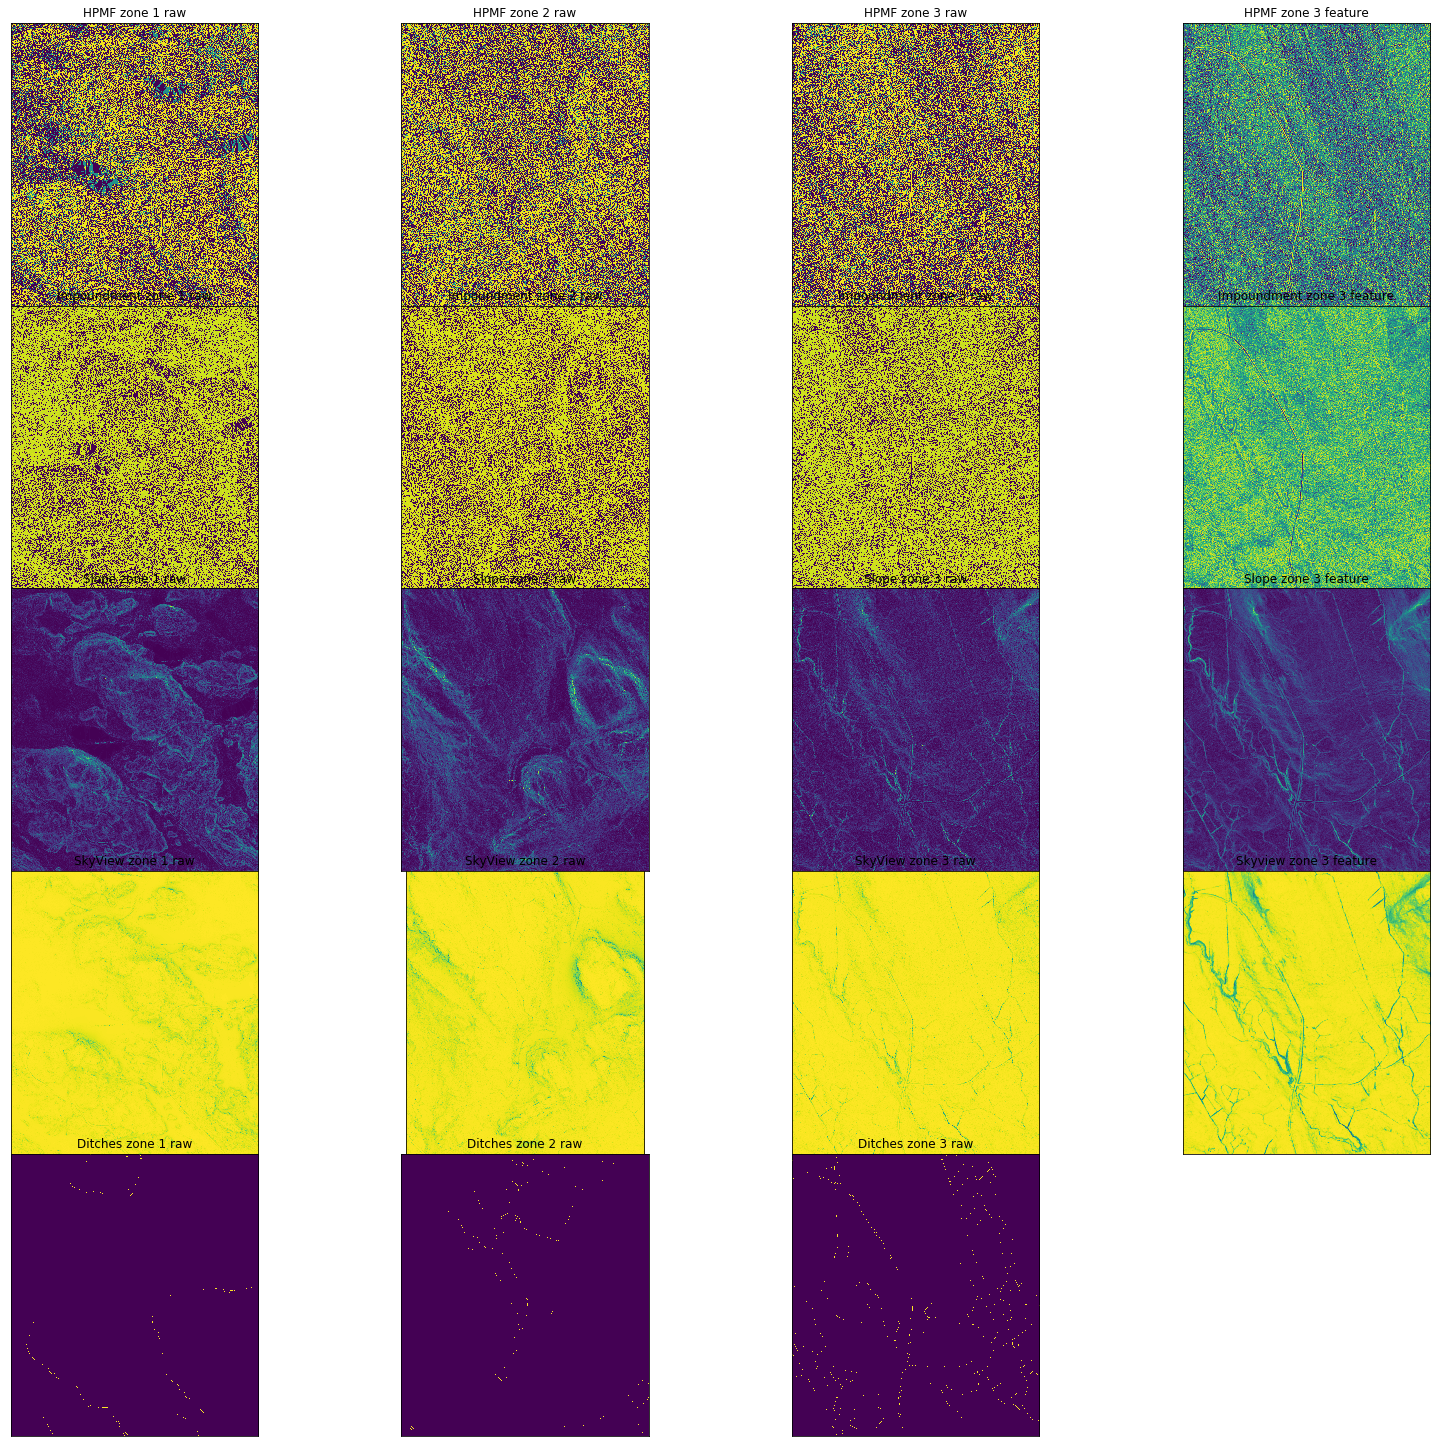

In [193]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
ax = [plt.subplot(5,4,i+1) for i in range(19)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)


ax[0].title.set_text("HPMF zone 1 raw")
ax[0].imshow(np.load("../feature_extracted/3_zones_features/HPMF_zone1_raw.npy"))

ax[1].title.set_text("HPMF zone 2 raw")
ax[1].imshow(np.load("../feature_extracted/3_zones_features/HPMF_zone2_raw.npy"))

ax[2].title.set_text("HPMF zone 3 raw")
ax[2].imshow(np.load("../feature_extracted/3_zones_features/HPMF_zone3_raw.npy"))

ax[3].title.set_text("HPMF zone 3 feature")
ax[3].imshow(np.load("../feature_extracted/3_zones_features/HPMF_mean3_zone3.npy"))

ax[4].title.set_text("Impoundment zone 1 raw")
ax[4].imshow(np.load("../feature_extracted/3_zones_features/Impoundment_zone1_raw.npy"))

ax[5].title.set_text("Impoundment zone 2 raw")
ax[5].imshow(np.load("../feature_extracted/3_zones_features/Impoundment_zone2_raw.npy"))

ax[6].title.set_text("Impoundment zone 3 raw")
ax[6].imshow(np.load("../feature_extracted/3_zones_features/Impoundment_zone3_raw.npy"))

ax[7].title.set_text("Impoundment zone 3 feature")
ax[7].imshow(np.load("../feature_extracted/3_zones_features/Impoundment_mean3_zone3.npy"))

ax[8].title.set_text("Slope zone 1 raw")
ax[8].imshow(np.load("../feature_extracted/3_zones_features/Slope_zone1_raw.npy"))

ax[9].title.set_text("Slope zone 2 raw")
ax[9].imshow(np.load("../feature_extracted/3_zones_features/Slope_zone2_raw.npy"))

ax[10].title.set_text("Slope zone 3 raw")
ax[10].imshow(np.load("../feature_extracted/3_zones_features/Slope_zone3_raw.npy"))

ax[11].title.set_text("Slope zone 3 feature")
ax[11].imshow(np.load("../feature_extracted/3_zones_features/Slope_mean3_zone3.npy"))

ax[12].title.set_text("SkyView zone 1 raw")
ax[12].imshow(np.load("../feature_extracted/3_zones_features/Skyview_zone1_raw.npy"))

ax[13].title.set_text("SkyView zone 2 raw")
ax[13].imshow(np.load("../feature_extracted/3_zones_features/Skyview_zone2_raw.npy"))

ax[14].title.set_text("SkyView zone 3 raw")
ax[14].imshow(np.load("../feature_extracted/3_zones_features/Skyview_zone3_raw.npy"))

ax[15].title.set_text("Skyview zone 3 feature")
ax[15].imshow(np.load("../feature_extracted/3_zones_features/Skyview_cone_5_0975_mean4_opening4_zone3.npy"))

ax[16].title.set_text("Ditches zone 1 raw")
ax[16].imshow(np.load("../feature_extracted/3_zones_features/Ditches_zone1_raw.npy"))

ax[17].title.set_text("Ditches zone 2 raw")
ax[17].imshow(np.load("../feature_extracted/3_zones_features/Ditches_zone2_raw.npy"))

ax[18].title.set_text("Ditches zone 3 raw")
ax[18].imshow(np.load("../feature_extracted/3_zones_features/Ditches_zone3_raw.npy"))

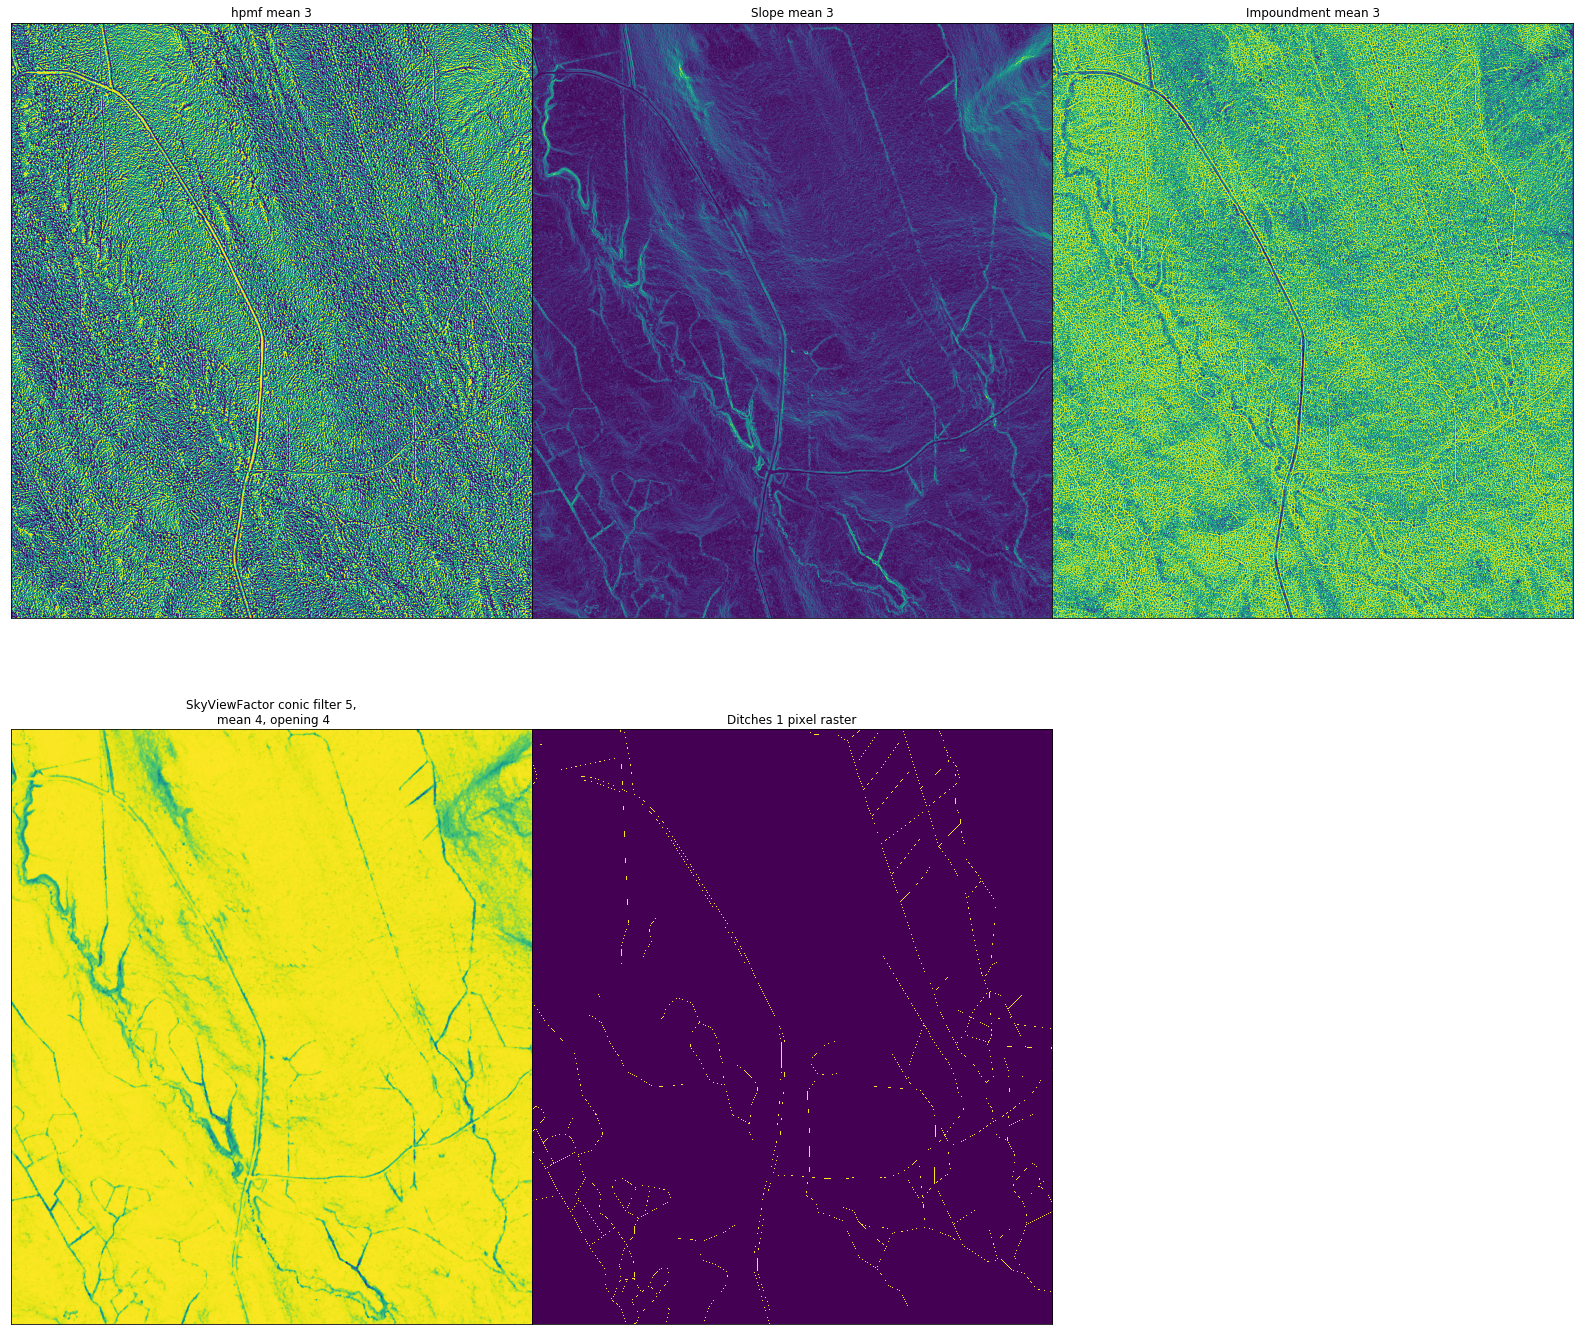

In [162]:
hpmfBigArr = np.load("hpmf_feature_means3_zone3.npy")
slopeBigArr = np.load("slope_feature_mean3_zone3.npy")
impoundmentBigArr = np.load("impoundment_feature_mean3_zone3.npy")
skyviewBigArr = np.load("skyview_feature_cone_5_0975_mean4_opening4_zone3.npy")
ditchesBigArr = np.load("ditches_zone3.npy")

plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,3,i+1) for i in range(5)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)


ax[0].title.set_text("hpmf mean 3")
ax[0].imshow(hpmfBigArr)

ax[1].title.set_text("Slope mean 3")
ax[1].imshow(slopeBigArr)

ax[2].title.set_text("Impoundment mean 3")
ax[2].imshow(impoundmentBigArr)

ax[3].title.set_text("SkyViewFactor conic filter 5,\n mean 4, opening 4")
ax[3].imshow(skyviewBigArr)

ax[4].title.set_text("Ditches 1 pixel raster")
ax[4].imshow(ditchesBigArr)

In [179]:
'''
skyviewBigArr = np.load("skyview_feature_cone_5_0975_mean4_opening4_zone3.npy")
skyViewIm = Image.open("../cropped_data/croppedImage_2625x3000_skyview_9950_8302_12575_11302.tif")
skyviewOrig = np.asarray(skyViewIm)

cutFeatureList = skyviewBigArr.tolist()
cutList = skyviewOrig.tolist()

cutList = cutList[:2999]
cutFeatureList = cutFeatureList[:2999]


np.save("skyview_feature_cut.npy", np.array(cutFeatureList))
np.save("skyview_cut.npy", np.array(cutList))

cut = np.load("skyview_cut.npy")
cutFeature = np.load("skyview_feature_cut.npy")
'''

        

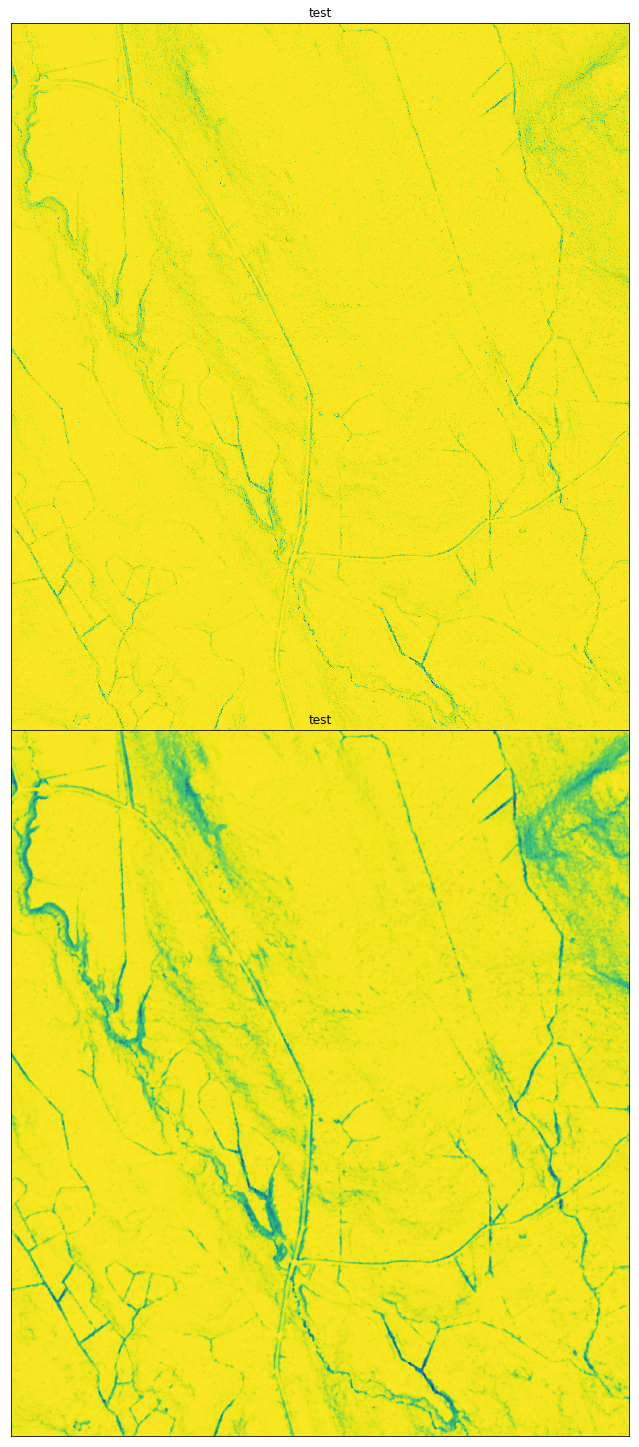

In [180]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,1,i+1) for i in range(2)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)


ax[0].title.set_text("test")
ax[0].imshow(cut)

ax[1].title.set_text("test")
ax[1].imshow(cutFeature)